<a href="https://colab.research.google.com/github/AlyFigueroa/Estad-stica-1-y-2/blob/main/PartePr%C3%A1ctica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

# ESTADÍSTICA DESCRIPTIVA EN LENGUAJE python



Parte práctica realizada por:


*   Alison Figueroa
*   Desli Quintero
*   Juan Diego Perez

In [5]:
 from google.colab import files
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [18]:
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)


,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [49]:
df = tabla[["EDAD_PADRE", "N_EMB"]]
df.head(3)


,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1


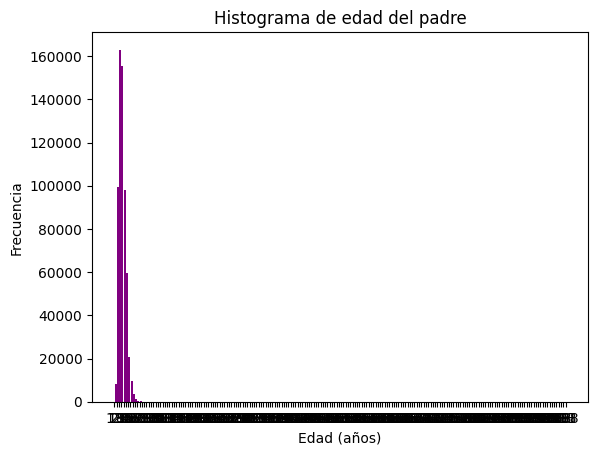

In [64]:
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE) + 1, 5)
plt.hist(df.EDAD_PADRE, bins=intervalos, color="purple", rwidth=0.85)
plt.title("Histograma de edad del padre")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.xticks(intervalos)
plt.show()


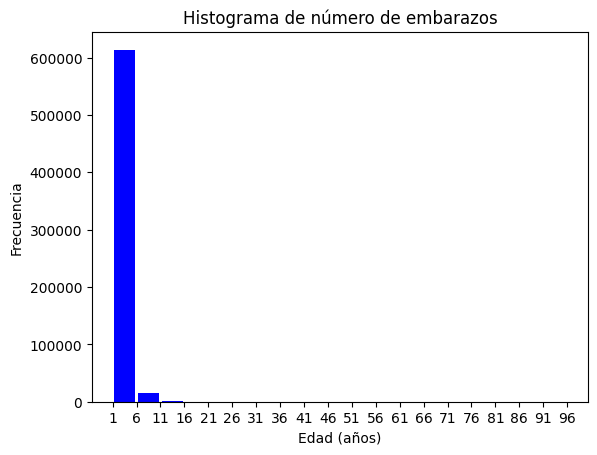

In [63]:
intervalos = range(min(df.N_EMB), max(df.N_EMB) + 1, 5)
plt.hist(df.N_EMB, bins=intervalos, color="blue", rwidth=0.85)
plt.title("Histograma de número de embarazos")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.xticks(intervalos)
plt.show()


In [71]:
df1 = df[(df.EDAD_PADRE < 120) & (df.N_EMB < 99)]
df1.head(5)


,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1
44,20,1
44,20,1


<ipython-input-65-4bc2cab72390>:9: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



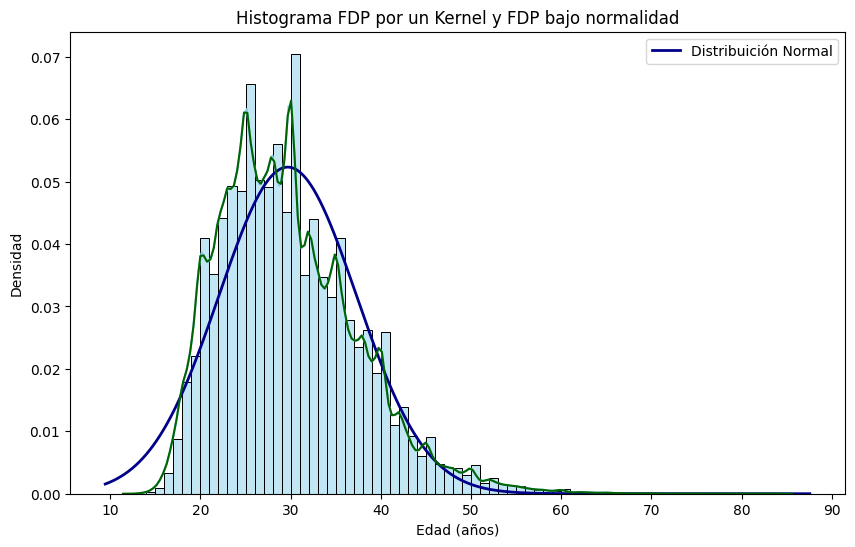

In [65]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos1, kde = True, stat = "density", color = "skyblue", edgecolor= "black")#kde=true es la grafica de la función de densidad de probabilidad estimada por el metodo kernell

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE)) #pdf=función de densidad de probapilidad de la distribución normal, mean=media, std=desviación  estandar

plt.plot(x, p, 'k', linewidth=2, label='Distribuición Normal', color = "darkblue")
sns.kdeplot(x=df1.EDAD_PADRE, color ="darkgreen")

plt.title("Histograma FDP por un Kernel y FDP bajo normalidad")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.legend()

plt.show()

Sea $X:=$ Edad del padre de un recien nacido en Colombia.
Descriptivamente como la funcion de densidad de probabilidad de los datos estimada por  un metodo kernel (linea verde) no coincide con la cuncion de densidad de probabilidad asumiendo el supuesto de normalidad (linea azul). $X\sim \text{normal}  (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, entonces no asumimos normalidad.

<ipython-input-72-ba49131560ff>:9: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



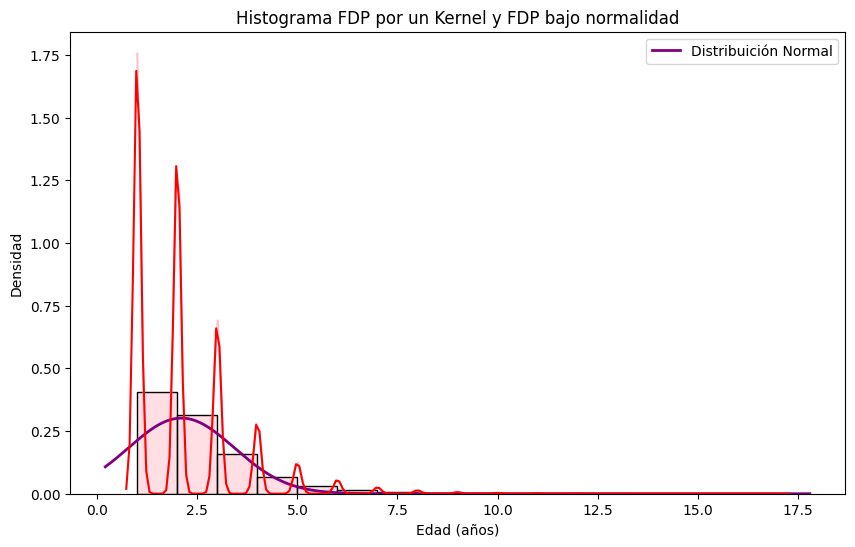

In [72]:
intervalos1 = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalos1, kde = True, stat = "density", color = "pink", edgecolor= "black")#kde=true es la grafica de la función de densidad de probabilidad estimada por el metodo kernell

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB)) #pdf=función de densidad de probapilidad de la distribución normal, mean=media, std=desviación  estandar

plt.plot(x, p, 'k', linewidth=2, label='Distribuición Normal', color = "Purple")
sns.kdeplot(x=df1.N_EMB, color ="red")

plt.title("Histograma FDP por un Kernel y FDP bajo normalidad")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.legend()

plt.show()

sea $X':=$ Número de embarazos en Colombia.
Descriptivamente como la funcion de densidad de probabilidad de los datos estimada por  un metodo kernel (linea roja) no coincide con la cuncion de densidad de probabilidad asumiendo el supuesto de normalidad (linea morada). $X\sim \text{normal}  (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, entonces no asumimos normalidad.

In [23]:
shapiro(df1.EDAD_PADRE) #prueba de Shapiro Wilk, para probar que definitivamente no se tiene normalidad

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 619932.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9585491888310628), pvalue=np.float64(1.0851562824564832e-120))

*   Si el **valor p** en una prueba de hipótesis es menor que 0.05 se rechaza la hipótesis nula con una confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es menor que 0.05 no se rechaza la hipótesis nula con una confianza del 95%

En nuestor caso particular, tenemos que pvalue=0.0 < 0.05, es decir, se rechaza que la variables aleatoria de la edad de un padre de un recien nacido en Colombia presenta distribuición normal



In [24]:
df1.EDAD_PADRE.count()
len(df1.EDAD_PADRE)

619932

In [77]:
idx = np.random.randint(len(df1.EDAD_PADRE), size = 100)
shapiro(df1.EDAD_PADRE.index[idx])

ShapiroResult(statistic=np.float64(0.8584496637881648), pvalue=np.float64(2.4650644449044848e-08))

Como el valor p (igual a $1.000675320383948 ×10^{-9} $) es menor que 0.05, entonces rechaza que la variable aleatoria de la edad de un padre de un recien nacido en Colombia presenta distribuición normal.

In [74]:
shapiro(df1.N_EMB)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 620089.



ShapiroResult(statistic=np.float64(0.7727150151798861), pvalue=np.float64(7.969573267819491e-175))

In [75]:
df1.N_EMB.count()
len(df1.N_EMB)

620089

In [76]:
idx = np.random.randint(len(df1.N_EMB), size = 100)
shapiro(df1.N_EMB.index[idx])

ShapiroResult(statistic=np.float64(0.8835494289266342), pvalue=np.float64(2.5726835289385585e-07))

En este caso, tenemos que pvalue=  7.96 × 10⁻¹⁷⁵< 0.05 rechazas la hipótesis de normalidad y el número de embarazos en Colombia no se comporta como una distribución normal.

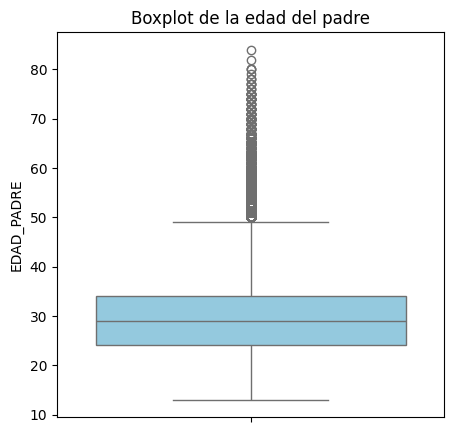

In [78]:
plt.figure(figsize=(5,5))
sns.boxplot(df1.EDAD_PADRE, color ="skyblue", saturation=0.75)
plt.title("Boxplot de la edad del padre")
plt.show()

Se considera que la edad de un padre de un recien nacido en Colombia es atípica si es mayor que 50 años. El primer cuartil es aproximadamente 25 años, la media aritmética es aproximadamente 29 años y el tercer cuartil es aproximadamente 35 años.

$\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} =35 - 25 =10$

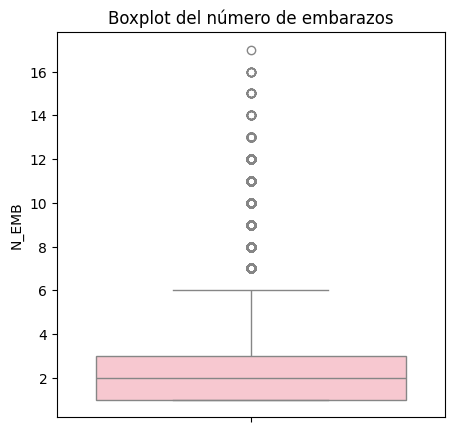

In [80]:
plt.figure(figsize=(5,5))
sns.boxplot(df1.N_EMB, color ="pink", saturation=0.75)
plt.title("Boxplot del número de embarazos")
plt.show()

El análisis del número de embarazos en Colombia muestra que los valores superiores a 6 pueden ser considerados atípicos. El primer cuartil es igual a 1, la media aritmética es 2, y el tercer cuartil es 3.

$\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} =3 - 1 =2$

In [38]:
print(f"Media : {np.mean(df1.EDAD_PADRE)}")
print(f"Varianza : {np.var(df1.EDAD_PADRE)}y la desviación estándar es de {np.std(df1.EDAD_PADRE)}")
print(f"Asimetría : {skew(df1.EDAD_PADRE)}")
print(f"Curtosis : {kurtosis(df1.EDAD_PADRE)}")

Media : 29.677262990134402
Varianza : 58.13770767232451y la desviación estándar es de 7.624808697424776
Asimetría : 0.8353028835229743
Curtosis : 0.9739261066839422




*   Aproximadamente el promedio de la edad de un padre de un recien nacido en Colombia es de 29.7 años
*   Aproximadamente la dstancia entre los valores de la edad un padre de un recien nacido enColombia y la media es de 7.62 años
*   La distribución de la edad de un padre de un recien nacido en Colombia es asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria
*   La distribución es platicúrtica, es decir, hay una baja concentración de las edades de un padre de un recien nacido en Colombia con respecto a al media



In [83]:
print(f"Media : {np.mean(df1.N_EMB)}")
print(f"Varianza : {np.var(df1.N_EMB)}y la desviación estándar es de {np.std(df1.N_EMB)}")
print(f"Asimetría : {skew(df1.N_EMB)}")
print(f"Curtosis : {kurtosis(df1.N_EMB)}")

Media : 2.1018111916192677
Varianza : 1.7487690570926004y la desviación estándar es de 1.3224103210019953
Asimetría : 1.9224080210250476
Curtosis : 6.016780393777454


*   En promedio, las mujeres en Colombia tienen alrededor de 2 embarazos.
*   La varianza indica la dispersión de los datos. Como no es muy alta comparada con la media, los datos no están tan dispersos, aunque hay cierta variabilidad (de 1.75).
*   El número de embarazos está fuertemente sesgado hacia la derecha (hay más mujeres con pocos embarazos, pero algunas pocas tienen muchos embarazos, y eso estira la distribución hacia la derecha)., es decir, la media es mayor que la moda de la variable aleatoria
*   La distribución es leptocúrtica, es decir, s decir, más concentrada alrededor de la media pero con colas más pesadas, evidenciando la presencia de valores extremos.



<function matplotlib.pyplot.show(close=None, block=None)>

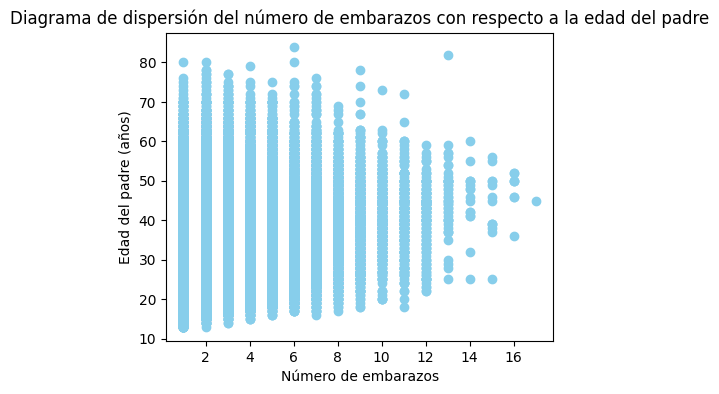

In [87]:
plt.figure(figsize=(5,4))
plt. scatter(df1.N_EMB, df1.EDAD_PADRE, color = "skyblue", marker ="o")
plt.title("Diagrama de dispersión del número de embarazos con respecto a la edad del padre")
plt.xlabel("Número de embarazos")
plt.ylabel("Edad del padre (años)")
plt.show


El número de embarazos y la edad de un padre en Colombia no están correlacionadas.

In [88]:
modelo = LinearRegression()
modelo.fit(np.array(df1.N_EMB).reshape(-1, 1), np.array(df1.EDAD_PADRE).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(df1.N_EMB).reshape(-1, 1))
predi_lineal

array([[27.43534225],
       [27.43534225],
       [27.43534225],
       ...,
       [29.47056813],
       [27.43534225],
       [27.43534225]])

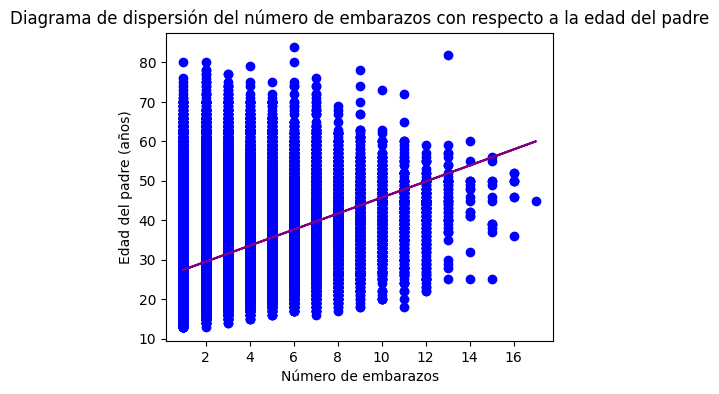

In [90]:
plt.figure(figsize=(5,4))
plt. scatter(df1.N_EMB, df1.EDAD_PADRE, color = "blue", marker ="o")
plt.plot(df1.N_EMB, predi_lineal, linestyle="-", color = "purple")
plt.title("Diagrama de dispersión del número de embarazos con respecto a la edad del padre")
plt.xlabel("Número de embarazos")
plt.ylabel("Edad del padre (años)")
plt.show()


De acuerdo con la recta de regresión se determina una correlación positiva, es decir que  los hombres con mayor edad tienden a tener parejas con más embarazos

In [91]:
coef_person = np.corrcoef(df1.N_EMB, df1.EDAD_PADRE)[0, 1]
coef_spearman, _ =spearmanr(df1.N_EMB, df1.EDAD_PADRE)
coef_kendall, _ = kendalltau(df1.N_EMB, df1.EDAD_PADRE)
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_person}, {coef_spearman} y {coef_kendall}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3529583266676772, 0.37985917047049816 y 0.29686774207661487.


Para la iterpretación de los coeficientes de correlación nos ayudaremos de la referencia:

Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://www.jstor.org/stable/2529310)

*   X y Y son independientes o no estaán correlacionadas: $\rho (X, Y) \approx 0, \eta (X,Y) \approx 0, \kappa (X,Y) \approx 0$
*   Y depende insignificantemente de X o X y Y están insignificantemente correlacionadas si  $0 < \vert \rho (X, Y) \vert < 0.2$, $0 < \eta (X, Y) \vert < 0.2$, $0 < \vert \kappa (X, Y) \vert < 0.2$
*  Y depende discretamente de X o X y Y están discretamente correlacionadas si  $0.2 < \vert \rho (X, Y) \vert < 0.4$, $0.2 < \eta (X, Y) \vert < 0.4$, $0.2 < \vert \kappa (X, Y) \vert < 0.4$
*  Y depende moderadamente de X o X y Y están moderadamente correlacionadas si  $0.4 < \vert \rho (X, Y) \vert < 0.6$, $0.4 < \eta (X, Y) \vert < 0.6$, $0.4 < \vert \kappa (X, Y) \vert < 0.6$
*  Y depende sustancialmente de X o X y Y están sustancialmente correlacionadas si  $0.6 < \vert \rho (X, Y) \vert < 0.8$, $0.6 < \eta (X, Y) \vert < 0.8$, $0.6 < \vert \kappa (X, Y) \vert < 0.8$
*  Y depende fuertemente de X o X y Y están fuertemente correlacionadas si  $0.8 < \vert \rho (X, Y) \vert < 1$, $0.8 < \eta (X, Y) \vert < 1$, $0.8 < \vert \kappa (X, Y) \vert < 1$

De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determinan que el número de embarazos y la edad de un padre de un recién nacido en Colombia están discretamente correlacionadas.